# Simple case for regression prediction currency data blueprint


 - Author: miti0
 - Date: 2.12.2017
 
-----

Sa

In [2]:
import numpy as np
import pandas as pd

%matplotlib inline


In [3]:
df = pd.read_csv('simple_reg_15_feat_sample.csv')
df = df.drop(df.columns[[0]], axis=1) 
df = df.reset_index(drop=True)

print('data-shape:', df.shape)
df.head()

data-shape: (9999, 17)


weightedAverage         high   high_index         ema3          low  \
0      1643.276521  1646.141293  1646.141293  1642.213021  1640.646247   
1      1645.421613  1648.000000  1648.000000  1644.832292  1640.758043   
2      1643.184173  1648.000000  1648.000000  1645.562187  1636.727089   
3      1645.079986  1646.787990  1646.787990  1645.713229  1640.739271   
4      1645.933757  1648.000000  1648.000000  1645.713229  1644.701872   

     low_index         open         ema6         tema     midpoint  \
0  1640.646247  1641.000000  1641.186758  1642.407450  1644.346803   
1  1640.758043  1644.957414  1643.356539  1642.491736  1644.272839   
2  1636.727089  1645.275788  1643.566149  1643.053235  1644.272839   
3  1640.739271  1643.189687  1643.963125  1642.702897  1644.272839   
4  1644.701872  1645.950000  1645.272760  1642.927218  1644.272839   

         ema12    mid_price          wma        ema24        trima  \
0  1644.089567  1644.998055  1648.028786  1650.120991  1652.649933   
1  1643.668302  1644.998055  1647.834833  1649.745991  1652.040154   
2  1642.807159  1644.998055  1647.336420  1649.121420  1651.359231   
3  1641.981987  1644.998055  1647.044664  1648.536003  1650.641138   
4  1641.532820  1642.958723  1646.908841  1648.211679  1649.908706   

      y_plus30        y_now  
0  1656.703579  1645.496875  
1  1649.852934  1648.000000  
2  1646.471074  1643.189687  
3  1644.700000  1645.950000  
4  1648.488453  1648.000000

### Sample preview of y_now and y_plus30

Here we can see that y_plus30 is y_now price + some offset

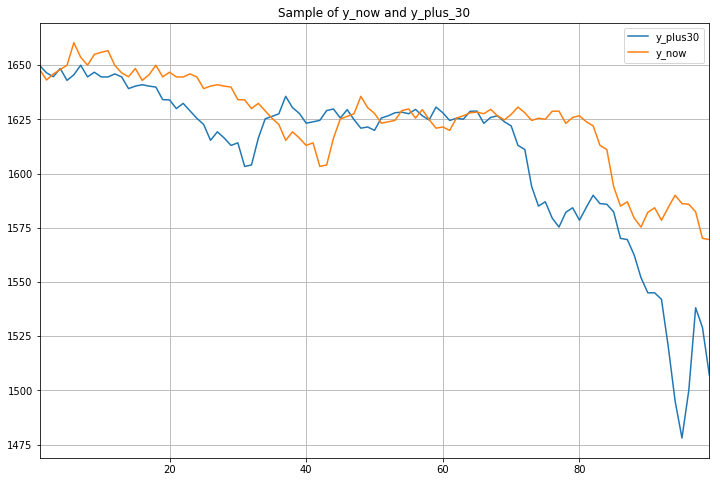

In [3]:
df.iloc[1:100][['y_plus30', 'y_now']].plot(grid=True,  figsize=(12, 8), title='Sample of y_now and y_plus_30');

In [4]:
X = df.drop(['y_plus30', 'y_now'], axis=1)
y = df['y_plus30']
y_real = df['y_now']
X.shape

(9999, 15)

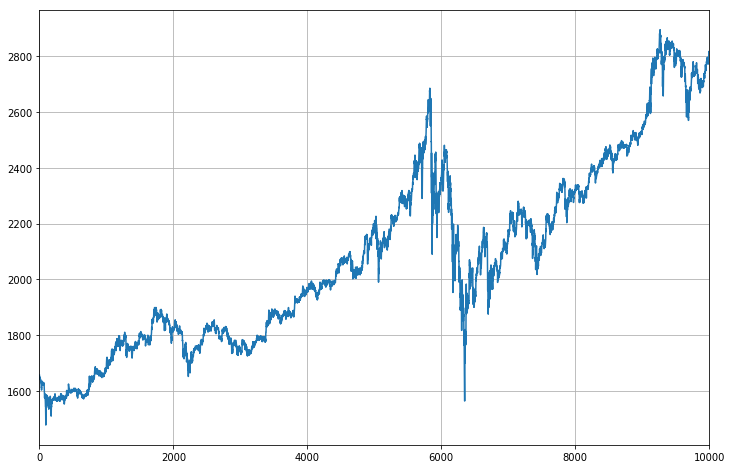

In [5]:
y.plot(grid=True, figsize=(12, 8));

### Setting apart some data for cross validation


In [6]:

X_cv = X.iloc[-500:]
y_cv = y.iloc[-500:].as_matrix()
y_real_cv = y_real.iloc[-500:].as_matrix()

X = X.iloc[:-500]
y = y.iloc[:-500]

## Prediciting

In [21]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.neural_network import MLPRegressor


#poly = PolynomialFeatures(degree=2)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, shuffle=False)

#X_train = poly.fit_transform(X_train)
#X_test = poly.fit_transform(X_test)

model = linear_model.LinearRegression()
model.fit(X_train, y_train)

y_hat = model.predict(X_test)

# Measure 
mae = mean_absolute_error(y_test, y_hat)
mse = mean_squared_error(y_test, y_hat)
r2 = r2_score(y_test, y_hat)

print('Variance score:',  r2)
print('mae:', mae)
print('mse:', mse)

Variance score: 0.98091579777
mae: 22.8666653228
mse: 1105.02607489


In [22]:
y_test_0 = y_test.reset_index(drop=True)
#print(y_test['y_plus30'])
Y_test_df = pd.DataFrame({'y_test': y_test_0 , 'y_pred_test':y_hat})
Y_test_df.iloc[-50:,].head()

y_pred_test   y_test
3085  2851.732375  2848.21
3086  2844.820366  2850.00
3087  2838.961984  2848.00
3088  2835.438495  2840.00
3089  2837.093083  2838.90

### Plotting our test results

In [23]:
Y_test_df = pd.DataFrame({'y_test': y_test, 'y_pred_test':y_hat})
Y_test_df.head()

y_pred_test  y_test
6364  1767.592711  1810.0
6365  1822.322583  1782.0
6366  1703.878822  1766.0
6367  1746.447790  1766.1
6368  1748.861766  1835.0

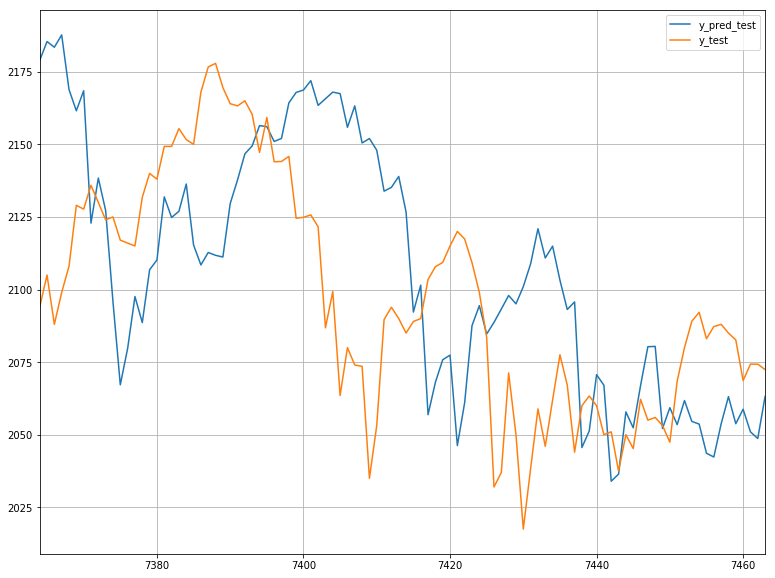

In [24]:
Y_test_df.iloc[1000:1100].plot(figsize=(13, 10), grid=True);

## Trying our model with our CV dataset

In [25]:
X_cv = X_cv.reset_index(drop=True)
y_cv_hat = model.predict(X_cv)

In [26]:
Y_cv_df_out = pd.DataFrame({'y_cv_pred': y_cv_hat, 'y_cv':y_cv, 'y_real': y_real_cv})

Y_cv_df_out.head()
#Y_cv_df_out = Y_cv_df.reset_index(drop=True)

y_cv    y_cv_pred       y_real
0  2768.663038  2800.910299  2802.008000
1  2777.600000  2786.172162  2780.681000
2  2780.000000  2797.768468  2789.512328
3  2783.000000  2796.021372  2790.705169
4  2773.930632  2795.687473  2793.705169

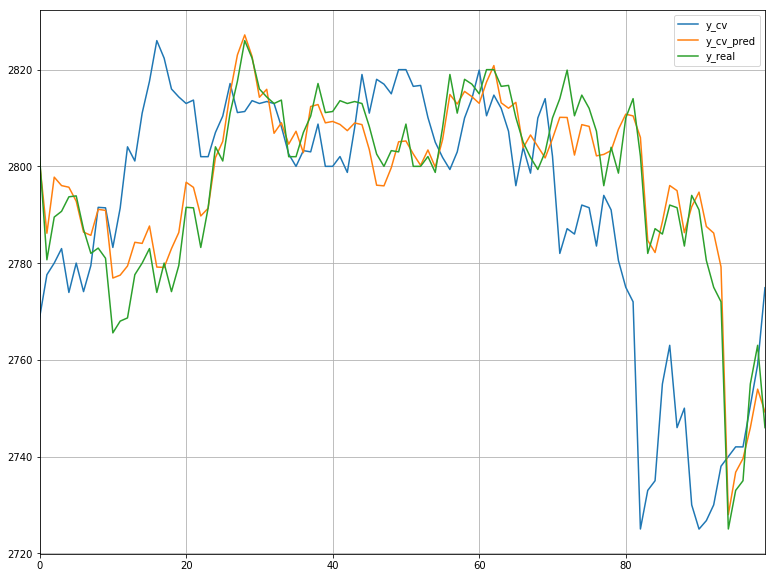

In [27]:
Y_cv_df_out.iloc[0:100].plot(figsize=(13, 10), grid=True)